# Bar data

In [118]:
from ib_insync import *
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels import regression,stats
import math
import datetime 
import statsmodels.formula.api as smf 
from datetime import date, time, datetime, timedelta
#from xml.etree import ElementTree as ET
from IPython.core.debugger import set_trace
import seaborn as sns

In [120]:
# Connect to IB Server
ib=IB()
util.startLoop()
ib.connect('127.0.0.1',7497, clientId= 865)

<IB connected to 127.0.0.1:7497 clientId=865>

In [121]:
# find a stock contract and fully qualify it with all the attributes
ticker ='SPY'
ticker1 = 'GME'

contract = Contract(symbol = ticker, secType = 'STK', exchange = 'SMART',currency = 'USD')
ib.qualifyContracts(contract)

contract1 = Contract(symbol = ticker1, secType = 'STK', exchange = 'SMART',currency = 'USD')
ib.qualifyContracts(contract1)

[Contract(secType='STK', conId=36285627, symbol='GME', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='GME', tradingClass='GME')]

In [122]:
#Grab price and volume data from IB

bar = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 Y',
        barSizeSetting='1 day',
        whatToShow='Trades',
        useRTH=True,
        formatDate=1)


Peer closed connection


In [110]:
#Convert the bar data into pandas frame

df = util.df(bar) # last trade
#check the top 5 rows
df.head()
#bar data 

,date,open,high,low,close,volume,average,barCount
0,2020-02-04,328.07,330.01,327.72,329.06,401199,329.1695,196897
1,2020-02-05,332.27,333.09,330.67,332.86,432226,332.0285,219838
2,2020-02-06,333.92,334.19,332.80,333.98,300233,333.7005,148356
3,2020-02-07,332.82,333.62,331.60,332.20,382175,332.5325,179203
4,2020-02-10,331.23,334.72,331.19,334.68,290189,333.3230,135475


These is called bar data: each rows corresponds to a bar of price range within a given time interval.

In [111]:
# we can also get bid or ask price
bar_bid = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 Y',
        barSizeSetting='1 day',
        whatToShow='BID',
        useRTH=True,
        formatDate=1)

bar_ask = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 Y',
        barSizeSetting='1 day',
        whatToShow='ASK',
        useRTH=True,
        formatDate=1)

df_bid = util.df(bar_bid)
df_ask = util.df(bar_ask)

In [112]:
df_bid.head()

,date,open,high,low,close,volume,average,barCount
0,2020-02-04,328.07,330.00,327.72,329.07,-1,-1.0,-1
1,2020-02-05,332.26,333.08,330.67,332.82,-1,-1.0,-1
2,2020-02-06,333.92,334.19,332.80,333.96,-1,-1.0,-1
3,2020-02-07,332.82,333.60,331.60,332.20,-1,-1.0,-1
4,2020-02-10,331.23,334.71,331.20,334.68,-1,-1.0,-1


In [113]:
df_ask.head()

,date,open,high,low,close,volume,average,barCount
0,2020-02-04,328.08,330.01,327.73,329.09,-1,-1.0,-1
1,2020-02-05,332.27,333.09,330.68,332.83,-1,-1.0,-1
2,2020-02-06,333.93,334.20,332.81,333.97,-1,-1.0,-1
3,2020-02-07,332.83,333.62,331.61,332.21,-1,-1.0,-1
4,2020-02-10,331.23,334.72,331.23,334.69,-1,-1.0,-1


In [114]:
#compare log return and percentage return

df['log'] = df['close'].apply(lambda x: math.log(x))
df['pct'] = df['close'].pct_change()
df['log_diff'] = df['log'].diff()

volatility is: 0.021462170525255234 skew is: -0.8768820366832853 kurtosis is: 7.477068354245054


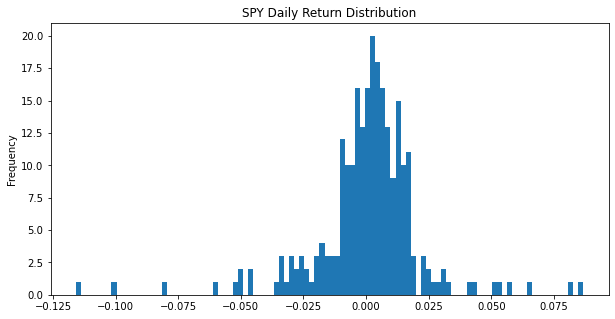

Peer closed connection


In [117]:
# Histogram and risk statistics

df['log_diff'].plot.hist(figsize = [10,5], bins = 100, title = str(ticker) +' Daily Return Distribution')

print ('volatility is:', df['log_diff'].std(), 'skew is:', df['log_diff'].skew(),'kurtosis is:', df['log_diff'].kurtosis())

volatility is: 0.03444106711821381 skew is: -0.022680022782346192 kurtosis is: 5.794282798289524


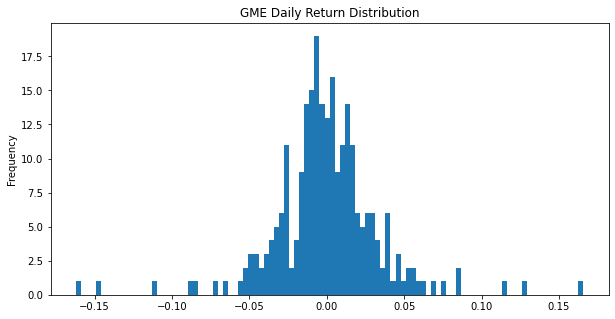

In [116]:
df1['log'] = df1['close'].apply(lambda x: math.log(x))
df1['pct'] = df1['close'].pct_change()
df1['log_diff'] = df1['log'].diff()

df1['log_diff'].plot.hist(figsize = [10,5], bins = 100, title = str(ticker1)+' Daily Return Distribution')

print ('volatility is:', df1['log_diff'].std(), 'skew is:', df1['log_diff'].skew(),'kurtosis is:', df1['log_diff'].kurtosis())

<ipython-input-88-cee5bafb4f61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['date'] = pd.to_datetime(ohlc['date'])
<ipython-input-88-cee5bafb4f61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)


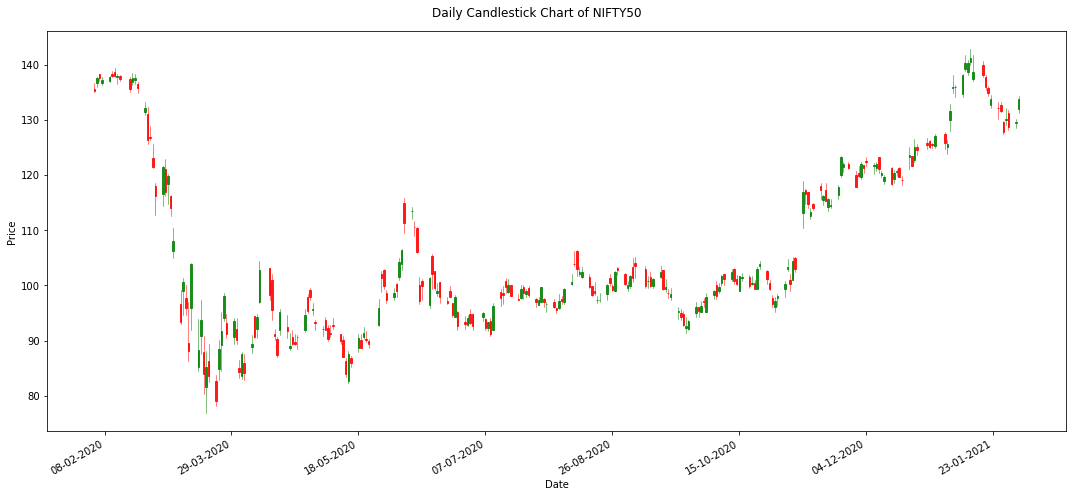

In [88]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates


ohlc = df[['date', 'open', 'high', 'low', 'close']]
ohlc['date'] = pd.to_datetime(ohlc['date'])
ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots(figsize =[15,7])

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()